In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
not_hot_songs = pd.read_csv("not_hot_songs_audio_features.csv")
hot_songs = pd.read_csv("hot_songs_audio_features.csv")

In [94]:
not_hot_songs.drop(columns = 'Unnamed: 0', inplace = True)
hot_songs.drop(columns = 'Unnamed: 0', inplace = True)

In [95]:
not_hot_songs['dataset']= 'not_hot'

In [96]:
hot_songs['dataset']= 'hot'

## cleaning dataframe

In [97]:
hot_songs.isnull().sum()/len(not_hot_songs)

artist              0.0
title               0.0
id                  0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
type                0.0
uri                 0.0
track_href          0.0
analysis_url        0.0
duration_ms         0.0
time_signature      0.0
dataset             0.0
dtype: float64

In [98]:
not_hot_songs.isnull().sum()/len(not_hot_songs)

artist              0.000000
title               0.000000
id                  0.000000
danceability        0.018083
energy              0.018083
key                 0.018083
loudness            0.018083
mode                0.018083
speechiness         0.018083
acousticness        0.018083
instrumentalness    0.018083
liveness            0.018083
valence             0.018083
tempo               0.018083
type                0.018083
uri                 0.018083
track_href          0.018083
analysis_url        0.018083
duration_ms         0.018083
time_signature      0.018083
dataset             0.000000
dtype: float64

In [99]:
list_of_row_index = not_hot_songs[not_hot_songs['energy'].isna() ==True].index.tolist()
not_hot_songs = not_hot_songs.drop(list_of_row_index,axis=0)

## concat Dataframe

In [100]:
full_df = pd.concat([hot_songs,not_hot_songs],axis=0)

In [101]:
full_df_num= full_df.select_dtypes(np.number)

In [102]:
full_df_num.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.589,0.472,8.0,-8.749,1.0,0.0502,0.614,0.000000,0.5050,0.898,67.196,126267.0,4.0
1,0.336,0.627,7.0,-7.463,1.0,0.0384,0.164,0.000000,0.0708,0.350,150.273,241107.0,4.0
2,0.754,0.424,2.0,-8.463,1.0,0.0363,0.643,0.000000,0.0652,0.806,119.705,130973.0,4.0
3,0.735,0.478,2.0,-12.472,1.0,0.0293,0.189,0.000002,0.3550,0.947,107.682,262960.0,4.0
4,0.683,0.375,0.0,-13.056,1.0,0.0303,0.579,0.000000,0.0760,0.888,140.467,135533.0,4.0


## scaling

In [103]:
X = full_df_num

In [104]:
import pickle
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
filename = "pickle/scaler.pkl" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.describe().T.round())
print()
display(X_scaled_df.describe().T.round())

,count,mean,std,min,25%,50%,75%,max
danceability,2799.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
energy,2799.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
key,2799.0,5.0,3.0,0.0,2.0,5.0,9.0,11.0
loudness,2799.0,-9.0,4.0,-38.0,-12.0,-9.0,-7.0,2.0
mode,2799.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
speechiness,2799.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
acousticness,2799.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
instrumentalness,2799.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
liveness,2799.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
valence,2799.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


,count,mean,std,min,25%,50%,75%,max
danceability,2799.0,0.0,1.0,-3.0,-1.0,0.0,1.0,2.0
energy,2799.0,-0.0,1.0,-3.0,-1.0,0.0,1.0,2.0
key,2799.0,-0.0,1.0,-2.0,-1.0,-0.0,1.0,2.0
loudness,2799.0,0.0,1.0,-7.0,-1.0,0.0,1.0,3.0
mode,2799.0,-0.0,1.0,-2.0,-2.0,1.0,1.0,1.0
speechiness,2799.0,0.0,1.0,-1.0,-0.0,-0.0,-0.0,12.0
acousticness,2799.0,0.0,1.0,-1.0,-1.0,-0.0,1.0,2.0
instrumentalness,2799.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0,4.0
liveness,2799.0,-0.0,1.0,-1.0,-1.0,-0.0,0.0,5.0
valence,2799.0,-0.0,1.0,-3.0,-1.0,0.0,1.0,2.0


## PCA

In [105]:
from sklearn.decomposition import PCA

# When we create an instance of PCA, we can specify how many principal components we want to extract.
# However, as we don't know beforehand how much variance it will explain each principal component it's
# allways better to not set the option "n_components" to a given integer number.

pca = PCA()
pca.fit(X_scaled_df)
principal_components = pca.transform(X_scaled_df)
principal_components_df = pd.DataFrame(principal_components, columns=['PCA_'+ str(i) for i in range(1,X_scaled_df.shape[1]+1)])
principal_components_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13
0,0.566161,-1.470286,-0.709572,1.489136,0.913610,0.007953,-2.144794,0.076324,1.064753,-0.055035,0.202829,0.507305,-0.523644
1,0.129421,1.589065,-0.787770,-0.254971,-0.851609,0.531091,0.340186,-1.276695,-0.357466,-0.217312,-0.209871,-0.157324,-0.239762
2,0.699341,-1.952949,-1.241813,-0.710347,0.030210,-0.091205,0.073557,0.136027,-0.193337,-0.303087,0.584020,-0.552033,-0.232194
3,0.125797,-1.389450,-0.416029,-0.520538,1.309499,-0.384587,-0.284515,0.427709,0.406447,1.272689,-0.665634,0.151562,-0.361299
4,1.227993,-1.818043,-1.460792,-1.178702,-0.060119,-0.883871,0.460112,0.249689,-0.543709,0.352941,-0.134996,-0.043195,-0.058969


In [106]:
print(pca.explained_variance_ratio_)
#cummulated
cumulated_explained_variance_ratio = [sum(pca.explained_variance_ratio_[0:i+1]) for i,value in enumerate(pca.explained_variance_ratio_)]
print(cumulated_explained_variance_ratio)

[0.19826689 0.12413852 0.10892752 0.08553435 0.08267984 0.07323613
 0.07012819 0.06294505 0.0614284  0.05571718 0.03530551 0.02889583
 0.01279657]
[0.1982668947295247, 0.3224054184969719, 0.4313329394112044, 0.5168672871261695, 0.5995471290673164, 0.6727832612007644, 0.7429114508316689, 0.8058565036891303, 0.8672849033890325, 0.9230020860031013, 0.9583075960454625, 0.9872034266536511, 1.0000000000000002]


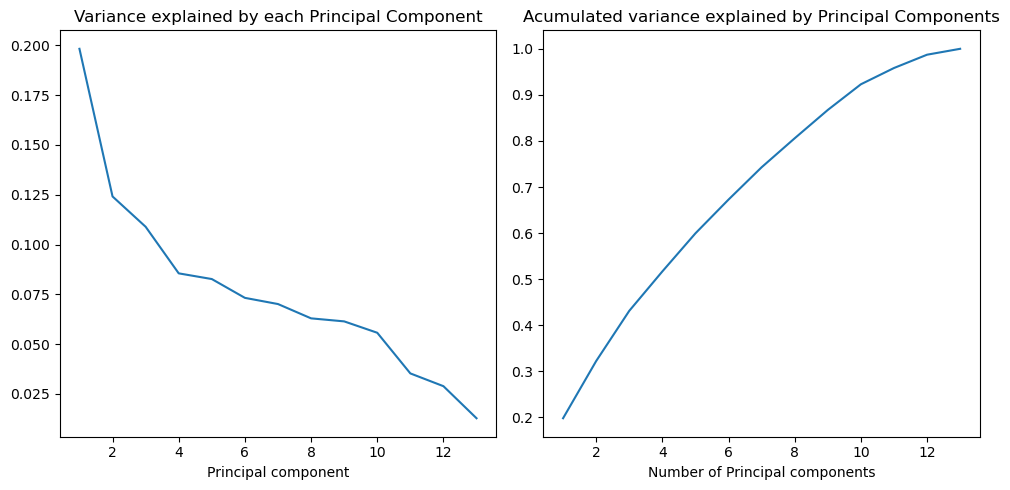

In [107]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(np.arange(1,14), pca.explained_variance_ratio_)
ax[0].set_xlabel("Principal component")
ax[0].set_title("Variance explained by each Principal Component")
ax[1].plot(np.arange(1,14),cumulated_explained_variance_ratio)
ax[1].set_title("Acumulated variance explained by Principal Components")
ax[1].set_xlabel("Number of Principal components")
plt.tight_layout()
plt.show()

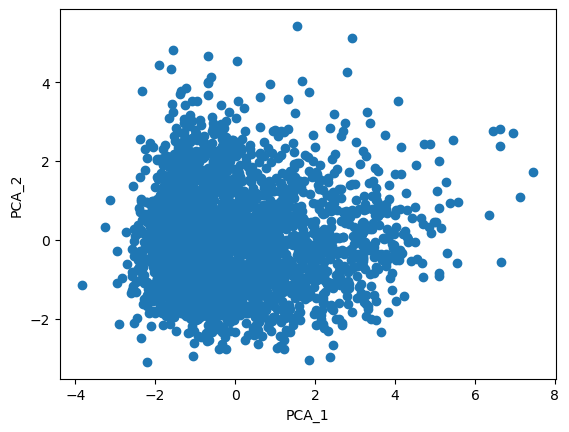

In [108]:
fig, ax = plt.subplots()
ax.scatter(principal_components_df['PCA_1'],principal_components_df['PCA_2'])
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
plt.show()

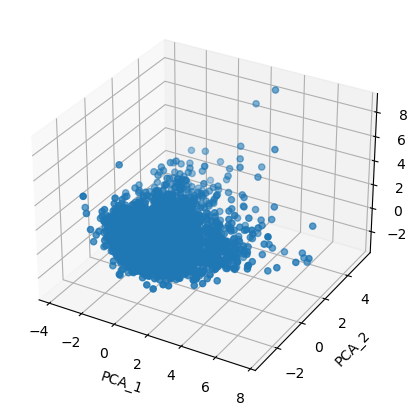

In [109]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components_df['PCA_1'],principal_components_df['PCA_2'], principal_components_df['PCA_3'])
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
ax.set_zlabel("PCA_3")
plt.show()

### We can't use the PCA methode because we one represent 40% of our data with PCA_1, PCA_2 and PCA_3

## ISOMAP

In [110]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=3, n_components=2)
iso.fit(X_scaled_df)
X_isomap_transformed = iso.transform(X_scaled_df)
X_isomap_transformed_df = pd.DataFrame(X_isomap_transformed, columns=["ISO_1","ISO_2"])
X_isomap_transformed_df.head()

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\schue\anaconda3\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


,ISO_1,ISO_2
0,-4.091517,-3.699122
1,-6.195031,1.008823
2,-6.163243,-4.325450
3,-3.413013,-3.315823
4,-5.659844,-3.131656


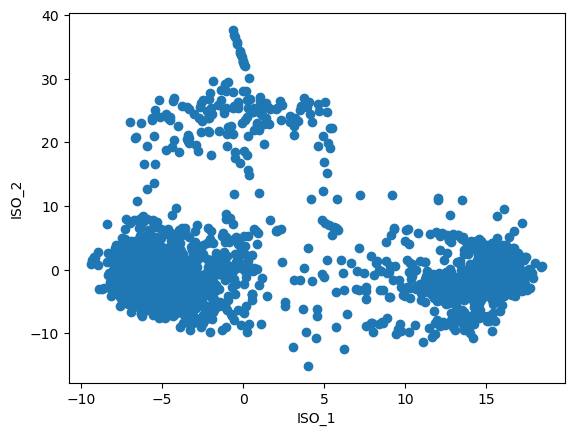

In [111]:
fig, ax = plt.subplots()
ax.scatter(X_isomap_transformed_df['ISO_1'],X_isomap_transformed_df['ISO_2'])
ax.set_xlabel("ISO_1")
ax.set_ylabel("ISO_2")
plt.show()

## UMAP

In [112]:
from umap import UMAP
reducer = UMAP(n_components=2,random_state=42)
reducer.fit(X_scaled_df)
X_umap_transformed = reducer.transform(X_scaled_df)
X_umap_transformed_df = pd.DataFrame(X_umap_transformed, columns=["UMAP_1","UMAP_2"])
X_umap_transformed_df.head()

C:\Users\schue\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,UMAP_1,UMAP_2
0,-1.177344,6.048987
1,-4.348997,6.807801
2,-0.962190,4.102377
3,-2.275147,4.027830
4,-0.685585,4.103041


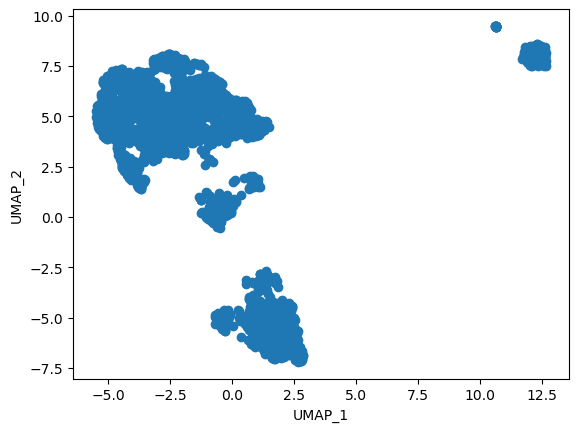

In [113]:
fig, ax = plt.subplots()
ax.scatter(X_umap_transformed_df['UMAP_1'],X_umap_transformed_df['UMAP_2'])
ax.set_xlabel("UMAP_1")
ax.set_ylabel("UMAP_2")
plt.show()

## TSNE

In [114]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, init='random', perplexity=40, random_state=12)

X_tsne_transformed = tsne.fit_transform(X_scaled_df)
X_tsne_transformed_df = pd.DataFrame(X_tsne_transformed, columns=["TSNE_1","TSNE_2"])
X_tsne_transformed_df.head()

,TSNE_1,TSNE_2
0,30.023718,11.424820
1,14.207449,-28.431923
2,21.548481,29.033052
3,34.507187,7.958550
4,20.888241,32.836472


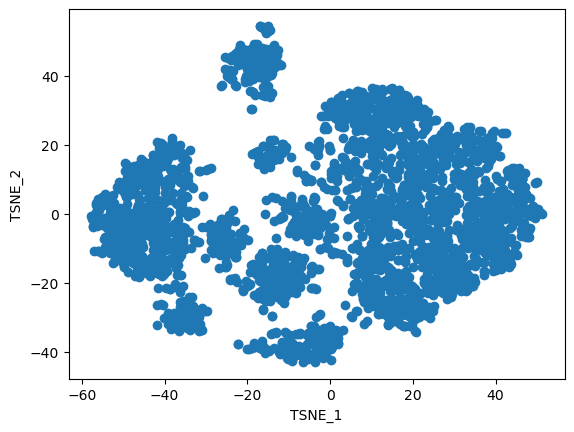

In [115]:
fig, ax = plt.subplots()
ax.scatter(X_tsne_transformed_df['TSNE_1'],X_tsne_transformed_df['TSNE_2'])
ax.set_xlabel("TSNE_1")
ax.set_ylabel("TSNE_2")
plt.show()

## K-MEAN

In [116]:
X_scaled_df = X_umap_transformed_df

In [117]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled_df)

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [119]:
clusters = kmeans.predict(X_scaled_df)
pd.Series(clusters).value_counts().sort_index() 

X["cluster_K_mean"] = clusters
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_K_mean
0,0.589,0.472,8.0,-8.749,1.0,0.0502,0.614,0.000000,0.5050,0.898,67.196,126267.0,4.0,0
1,0.336,0.627,7.0,-7.463,1.0,0.0384,0.164,0.000000,0.0708,0.350,150.273,241107.0,4.0,0
2,0.754,0.424,2.0,-8.463,1.0,0.0363,0.643,0.000000,0.0652,0.806,119.705,130973.0,4.0,0
3,0.735,0.478,2.0,-12.472,1.0,0.0293,0.189,0.000002,0.3550,0.947,107.682,262960.0,4.0,0
4,0.683,0.375,0.0,-13.056,1.0,0.0303,0.579,0.000000,0.0760,0.888,140.467,135533.0,4.0,0


In [120]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=42,
                    verbose=1)
    kmeans.fit(X_scaled_df)

    filename = "pickle/kmeans/kmeans_" + str(k) + ".pkl" # Path with filename # kmeans_n.pickle
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))
    

Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 118413.53125.
Iteration 1, inertia 72304.21875.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 64337.015625.
Iteration 1, inertia 49294.25.
Iteration 2, inertia 48856.66796875.
Iteration 3, inertia 48662.015625.
Iteration 4, inertia 48545.71484375.
Iteration 5, inertia 48459.953125.
Converged at iteration 5: center shift 0.0016072356374934316 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 68470.765625.
Iteration 1, inertia 53407.640625.
Iteration 2, inertia 53318.75.
Iteration 3, inertia 53311.625.
Converged at iteration 3: center shift 0.00010565432603470981 within tolerance 0.0018909391403198242.
Initialization complete


C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Iteration 0, inertia 74911.0078125.
Iteration 1, inertia 53384.171875.
Iteration 2, inertia 53311.7421875.
Converged at iteration 2: center shift 0.00010437711898703128 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 53293.8515625.
Iteration 1, inertia 48459.62109375.
Iteration 2, inertia 48457.75390625.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 126829.9609375.
Iteration 1, inertia 72304.21875.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 65220.4140625.
Iteration 1, inertia 48875.7890625.
Iteration 2, inertia 48667.93359375.
Iteration 3, inertia 48553.45703125.
Iteration 4, inertia 48460.5546875.
Iteration 5, inertia 48458.05859375.
Converged at iteration 5: center shift 0.00025058822939172387 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 128550.53125.
Iteration 1, inertia 72304.21875.
Converged at iteration 1: strict

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Iteration 1, inertia 16023.669921875.
Iteration 2, inertia 15676.7822265625.
Iteration 3, inertia 15484.2353515625.
Iteration 4, inertia 15391.75390625.
Iteration 5, inertia 15270.6328125.
Iteration 6, inertia 15249.390625.
Converged at iteration 6: center shift 0.0002556479594204575 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 19772.55859375.
Iteration 1, inertia 15819.5869140625.
Iteration 2, inertia 15582.14453125.
Iteration 3, inertia 15446.689453125.
Iteration 4, inertia 15360.0048828125.
Iteration 5, inertia 15252.658203125.
Iteration 6, inertia 15249.125.
Converged at iteration 6: center shift 0.00025404244661331177 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 15811.822265625.
Iteration 1, inertia 15248.9111328125.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 18010.49609375.
Iteration 1, inertia 15250.818359375.
Iteration 2, inertia 15248.912109375.
Conve

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Iteration 6, inertia 9495.0361328125.
Iteration 7, inertia 9436.66796875.
Iteration 8, inertia 9405.5205078125.
Iteration 9, inertia 9379.7880859375.
Iteration 10, inertia 9366.9345703125.
Iteration 11, inertia 9352.765625.
Iteration 12, inertia 9346.5625.
Converged at iteration 12: center shift 0.0006872033118270338 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 14566.123046875.
Iteration 1, inertia 11607.896484375.
Iteration 2, inertia 11412.7666015625.
Iteration 3, inertia 10723.94921875.
Iteration 4, inertia 9816.279296875.
Iteration 5, inertia 9587.3701171875.
Iteration 6, inertia 9487.34765625.
Iteration 7, inertia 9432.263671875.
Iteration 8, inertia 9401.2998046875.
Iteration 9, inertia 9376.9482421875.
Iteration 10, inertia 9364.3916015625.
Iteration 11, inertia 9350.4208984375.
Iteration 12, inertia 9346.4814453125.
Converged at iteration 12: center shift 0.0005781094660051167 within tolerance 0.0018909391403198242.
Initialization complet

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Iteration 3, inertia 6714.0859375.
Iteration 4, inertia 6548.5849609375.
Iteration 5, inertia 6466.0927734375.
Iteration 6, inertia 6444.013671875.
Iteration 7, inertia 6438.36767578125.
Converged at iteration 7: center shift 0.0010220753028988838 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 9003.9462890625.
Iteration 1, inertia 6544.46826171875.
Iteration 2, inertia 6468.99560546875.
Iteration 3, inertia 6450.04833984375.
Iteration 4, inertia 6447.3330078125.
Converged at iteration 4: center shift 0.0010213194182142615 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 9644.5927734375.
Iteration 1, inertia 6493.5.
Iteration 2, inertia 6450.8173828125.
Iteration 3, inertia 6446.8828125.
Converged at iteration 3: center shift 0.000703793833963573 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 9861.65625.
Iteration 1, inertia 7726.234375.
Iteration 2, inertia 7540.37548828125.


C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Iteration 1, inertia 6393.7607421875.
Iteration 2, inertia 5903.228515625.
Iteration 3, inertia 5796.33984375.
Iteration 4, inertia 5761.94189453125.
Iteration 5, inertia 5741.40966796875.
Iteration 6, inertia 5727.10009765625.
Iteration 7, inertia 5689.08837890625.
Iteration 8, inertia 5542.00537109375.
Iteration 9, inertia 5360.8564453125.
Iteration 10, inertia 5249.25537109375.
Iteration 11, inertia 5187.7373046875.
Iteration 12, inertia 5108.09521484375.
Iteration 13, inertia 5003.69189453125.
Iteration 14, inertia 4890.09423828125.
Iteration 15, inertia 4776.44091796875.
Iteration 16, inertia 4708.43798828125.
Iteration 17, inertia 4679.05517578125.
Iteration 18, inertia 4666.8974609375.
Iteration 19, inertia 4659.849609375.
Iteration 20, inertia 4653.0263671875.
Iteration 21, inertia 4648.77783203125.
Iteration 22, inertia 4642.587890625.
Iteration 23, inertia 4629.173828125.
Iteration 24, inertia 4619.96240234375.
Iteration 25, inertia 4617.15771484375.
Converged at iteration 25

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Iteration 15, inertia 3999.84521484375.
Iteration 16, inertia 3987.19384765625.
Iteration 17, inertia 3982.318359375.
Converged at iteration 17: center shift 0.0015366848092526197 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 9024.7255859375.
Iteration 1, inertia 6257.68408203125.
Iteration 2, inertia 6007.92333984375.
Iteration 3, inertia 5819.1884765625.
Iteration 4, inertia 5425.353515625.
Iteration 5, inertia 5111.328125.
Iteration 6, inertia 4981.02197265625.
Iteration 7, inertia 4923.9375.
Iteration 8, inertia 4868.9794921875.
Iteration 9, inertia 4721.61962890625.
Iteration 10, inertia 4380.37060546875.
Iteration 11, inertia 4029.923583984375.
Iteration 12, inertia 3988.11279296875.
Iteration 13, inertia 3982.91943359375.
Iteration 14, inertia 3980.97216796875.
Converged at iteration 14: center shift 0.0009067690698429942 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 5119.0166015625.
Iteration 1, inert

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Initialization complete
Iteration 0, inertia 4624.736328125.
Iteration 1, inertia 3942.573974609375.
Iteration 2, inertia 3910.85986328125.
Iteration 3, inertia 3898.440185546875.
Iteration 4, inertia 3888.578125.
Iteration 5, inertia 3870.677001953125.
Iteration 6, inertia 3833.909912109375.
Iteration 7, inertia 3785.07177734375.
Iteration 8, inertia 3717.74658203125.
Iteration 9, inertia 3625.515869140625.
Iteration 10, inertia 3519.9853515625.
Iteration 11, inertia 3444.344482421875.
Iteration 12, inertia 3390.983154296875.
Iteration 13, inertia 3361.57861328125.
Iteration 14, inertia 3351.512939453125.
Iteration 15, inertia 3347.498291015625.
Iteration 16, inertia 3346.636474609375.
Converged at iteration 16: center shift 0.00039155781269073486 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 4218.7373046875.
Iteration 1, inertia 3450.00732421875.
Iteration 2, inertia 3381.74267578125.
Iteration 3, inertia 3358.29345703125.
Iteration 4, inertia 3

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Iteration 4, inertia 2781.566650390625.
Iteration 5, inertia 2772.43505859375.
Iteration 6, inertia 2771.09619140625.
Converged at iteration 6: center shift 0.0011245119385421276 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 3723.072021484375.
Iteration 1, inertia 3079.04833984375.
Iteration 2, inertia 3001.245361328125.
Iteration 3, inertia 2976.22900390625.
Iteration 4, inertia 2957.741943359375.
Iteration 5, inertia 2927.635498046875.
Iteration 6, inertia 2887.294677734375.
Iteration 7, inertia 2825.53076171875.
Iteration 8, inertia 2754.77294921875.
Iteration 9, inertia 2718.748779296875.
Iteration 10, inertia 2712.200439453125.
Iteration 11, inertia 2711.223876953125.
Converged at iteration 11: center shift 0.0007385093485936522 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 4845.50390625.
Iteration 1, inertia 3162.227294921875.
Iteration 2, inertia 2941.56884765625.
Iteration 3, inertia 2842.5390625.
Ite

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Iteration 5, inertia 2457.380126953125.
Iteration 6, inertia 2415.0205078125.
Iteration 7, inertia 2392.77978515625.
Iteration 8, inertia 2383.056640625.
Iteration 9, inertia 2377.529541015625.
Iteration 10, inertia 2375.12890625.
Iteration 11, inertia 2373.802490234375.
Converged at iteration 11: center shift 0.0003498590085655451 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 3460.14404296875.
Iteration 1, inertia 2835.472412109375.
Iteration 2, inertia 2699.57470703125.
Iteration 3, inertia 2611.54150390625.
Iteration 4, inertia 2566.676025390625.
Iteration 5, inertia 2553.64453125.
Iteration 6, inertia 2547.890380859375.
Iteration 7, inertia 2539.31494140625.
Iteration 8, inertia 2528.23291015625.
Iteration 9, inertia 2507.692138671875.
Iteration 10, inertia 2475.24072265625.
Iteration 11, inertia 2447.0576171875.
Iteration 12, inertia 2424.44189453125.
Iteration 13, inertia 2409.593505859375.
Iteration 14, inertia 2402.771728515625.
Iteration 

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Iteration 5, inertia 2258.333740234375.
Iteration 6, inertia 2250.932373046875.
Iteration 7, inertia 2245.5849609375.
Iteration 8, inertia 2243.900146484375.
Converged at iteration 8: center shift 0.00026293157134205103 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 3069.842041015625.
Iteration 1, inertia 2361.929931640625.
Iteration 2, inertia 2318.521484375.
Iteration 3, inertia 2293.155517578125.
Iteration 4, inertia 2272.803466796875.
Iteration 5, inertia 2264.084228515625.
Iteration 6, inertia 2257.208251953125.
Iteration 7, inertia 2250.7470703125.
Iteration 8, inertia 2246.22412109375.
Iteration 9, inertia 2240.698974609375.
Iteration 10, inertia 2230.0244140625.
Iteration 11, inertia 2212.58984375.
Iteration 12, inertia 2184.04345703125.
Iteration 13, inertia 2163.797119140625.
Iteration 14, inertia 2153.4814453125.
Iteration 15, inertia 2148.3125.
Iteration 16, inertia 2143.102783203125.
Iteration 17, inertia 2138.7265625.
Iteration 18, in

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Iteration 0, inertia 2678.858154296875.
Iteration 1, inertia 2153.805419921875.
Iteration 2, inertia 2104.96142578125.
Iteration 3, inertia 2089.6796875.
Iteration 4, inertia 2085.519287109375.
Iteration 5, inertia 2083.786865234375.
Iteration 6, inertia 2082.691162109375.
Iteration 7, inertia 2082.156982421875.
Converged at iteration 7: center shift 0.00023387513647321612 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 2863.4013671875.
Iteration 1, inertia 2114.219482421875.
Iteration 2, inertia 1999.1754150390625.
Iteration 3, inertia 1959.9835205078125.
Iteration 4, inertia 1945.6590576171875.
Iteration 5, inertia 1938.2777099609375.
Iteration 6, inertia 1935.3233642578125.
Iteration 7, inertia 1933.715576171875.
Iteration 8, inertia 1932.58837890625.
Iteration 9, inertia 1931.4798583984375.
Iteration 10, inertia 1930.669677734375.
Iteration 11, inertia 1929.396484375.
Iteration 12, inertia 1928.498779296875.
Iteration 13, inertia 1927.1501464843

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Initialization complete
Iteration 0, inertia 2587.19677734375.
Iteration 1, inertia 2090.730224609375.
Iteration 2, inertia 2041.8863525390625.
Iteration 3, inertia 2026.6046142578125.
Iteration 4, inertia 2022.4442138671875.
Iteration 5, inertia 2020.711669921875.
Iteration 6, inertia 2019.61572265625.
Iteration 7, inertia 2019.08203125.
Converged at iteration 7: center shift 0.0002338985214009881 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 2454.540283203125.
Iteration 1, inertia 2144.826171875.
Iteration 2, inertia 2041.1109619140625.
Iteration 3, inertia 1995.015869140625.
Iteration 4, inertia 1960.1868896484375.
Iteration 5, inertia 1950.07861328125.
Iteration 6, inertia 1943.878662109375.
Iteration 7, inertia 1938.34716796875.
Iteration 8, inertia 1933.0179443359375.
Iteration 9, inertia 1926.6041259765625.
Iteration 10, inertia 1922.681640625.
Iteration 11, inertia 1919.8773193359375.
Iteration 12, inertia 1917.8145751953125.
Iteration 13,

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Iteration 6, inertia 1573.6240234375.
Iteration 7, inertia 1552.77880859375.
Iteration 8, inertia 1545.849609375.
Iteration 9, inertia 1541.509765625.
Iteration 10, inertia 1539.2982177734375.
Iteration 11, inertia 1538.6104736328125.
Converged at iteration 11: center shift 0.0009366790764033794 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 2081.9697265625.
Iteration 1, inertia 1659.6602783203125.
Iteration 2, inertia 1582.1229248046875.
Iteration 3, inertia 1561.27685546875.
Iteration 4, inertia 1553.9730224609375.
Iteration 5, inertia 1551.1864013671875.
Iteration 6, inertia 1549.97119140625.
Converged at iteration 6: center shift 0.0009420920396223664 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 2311.66943359375.
Iteration 1, inertia 1762.51953125.
Iteration 2, inertia 1680.950439453125.
Iteration 3, inertia 1643.6533203125.
Iteration 4, inertia 1614.5030517578125.
Iteration 5, inertia 1586.3499755859375.

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Iteration 6, inertia 1461.2734375.
Iteration 7, inertia 1458.0235595703125.
Iteration 8, inertia 1456.27099609375.
Iteration 9, inertia 1455.34765625.
Converged at iteration 9: center shift 0.0018116127466782928 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 2003.050048828125.
Iteration 1, inertia 1627.3203125.
Iteration 2, inertia 1593.019775390625.
Iteration 3, inertia 1572.3916015625.
Iteration 4, inertia 1566.9642333984375.
Iteration 5, inertia 1565.1527099609375.
Iteration 6, inertia 1564.360595703125.
Iteration 7, inertia 1563.623046875.
Converged at iteration 7: center shift 0.0017964178696274757 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 1998.2197265625.
Iteration 1, inertia 1467.27880859375.
Iteration 2, inertia 1423.5841064453125.
Iteration 3, inertia 1406.0694580078125.
Iteration 4, inertia 1400.14599609375.
Iteration 5, inertia 1398.8416748046875.
Converged at iteration 5: center shift 0.0011622

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Iteration 2, inertia 1414.061279296875.
Iteration 3, inertia 1399.5701904296875.
Iteration 4, inertia 1391.8648681640625.
Iteration 5, inertia 1387.9395751953125.
Iteration 6, inertia 1384.8768310546875.
Iteration 7, inertia 1381.1202392578125.
Iteration 8, inertia 1378.498291015625.
Iteration 9, inertia 1377.0814208984375.
Iteration 10, inertia 1376.2093505859375.
Iteration 11, inertia 1375.3038330078125.
Iteration 12, inertia 1373.1988525390625.
Iteration 13, inertia 1370.7484130859375.
Iteration 14, inertia 1366.441162109375.
Iteration 15, inertia 1361.089111328125.
Iteration 16, inertia 1354.7587890625.
Iteration 17, inertia 1349.6724853515625.
Iteration 18, inertia 1345.3564453125.
Iteration 19, inertia 1340.7088623046875.
Iteration 20, inertia 1335.820556640625.
Iteration 21, inertia 1326.2952880859375.
Iteration 22, inertia 1320.7724609375.
Iteration 23, inertia 1319.0224609375.
Iteration 24, inertia 1318.234130859375.
Converged at iteration 24: center shift 0.000761990086175501

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Iteration 1, inertia 1325.282470703125.
Iteration 2, inertia 1300.965576171875.
Iteration 3, inertia 1289.037841796875.
Iteration 4, inertia 1280.6051025390625.
Iteration 5, inertia 1273.254638671875.
Iteration 6, inertia 1268.60400390625.
Iteration 7, inertia 1266.052490234375.
Iteration 8, inertia 1263.232177734375.
Iteration 9, inertia 1256.804931640625.
Iteration 10, inertia 1250.713623046875.
Iteration 11, inertia 1248.090576171875.
Iteration 12, inertia 1245.947998046875.
Iteration 13, inertia 1244.141845703125.
Iteration 14, inertia 1243.1419677734375.
Converged at iteration 14: center shift 0.0009814645163714886 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 1912.3892822265625.
Iteration 1, inertia 1574.1495361328125.
Iteration 2, inertia 1463.3515625.
Iteration 3, inertia 1437.9566650390625.
Iteration 4, inertia 1424.77978515625.
Iteration 5, inertia 1402.04541015625.
Iteration 6, inertia 1340.159423828125.
Iteration 7, inertia 1284.380615

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Iteration 11, inertia 1222.2264404296875.
Iteration 12, inertia 1221.12890625.
Converged at iteration 12: center shift 0.0012932935496792197 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 1658.1341552734375.
Iteration 1, inertia 1216.9427490234375.
Iteration 2, inertia 1172.9281005859375.
Iteration 3, inertia 1153.425537109375.
Iteration 4, inertia 1141.90380859375.
Iteration 5, inertia 1133.8477783203125.
Iteration 6, inertia 1123.0556640625.
Iteration 7, inertia 1109.3212890625.
Iteration 8, inertia 1099.4989013671875.
Iteration 9, inertia 1096.1939697265625.
Iteration 10, inertia 1094.64794921875.
Converged at iteration 10: center shift 0.0018775863572955132 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 1503.330322265625.
Iteration 1, inertia 1146.28076171875.
Iteration 2, inertia 1079.7921142578125.
Iteration 3, inertia 1064.8870849609375.
Iteration 4, inertia 1060.7569580078125.
Iteration 5, inertia 1058.

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Initialization complete
Iteration 0, inertia 1428.541259765625.
Iteration 1, inertia 1129.88427734375.
Iteration 2, inertia 1066.4151611328125.
Iteration 3, inertia 1039.805908203125.
Iteration 4, inertia 1013.38720703125.
Iteration 5, inertia 999.322509765625.
Iteration 6, inertia 993.1068115234375.
Iteration 7, inertia 990.2268676757812.
Iteration 8, inertia 988.9956665039062.
Converged at iteration 8: center shift 0.0018782307161018252 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 1446.62548828125.
Iteration 1, inertia 1168.533447265625.
Iteration 2, inertia 1120.8760986328125.
Iteration 3, inertia 1097.2501220703125.
Iteration 4, inertia 1079.60546875.
Iteration 5, inertia 1070.3563232421875.
Iteration 6, inertia 1065.1951904296875.
Iteration 7, inertia 1061.983154296875.
Iteration 8, inertia 1060.8564453125.
Converged at iteration 8: center shift 0.001399883534759283 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0,

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Iteration 8, inertia 948.960205078125.
Iteration 9, inertia 947.3386840820312.
Iteration 10, inertia 946.247314453125.
Converged at iteration 10: center shift 0.0018069621874019504 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 1341.7608642578125.
Iteration 1, inertia 1121.036376953125.
Iteration 2, inertia 1074.3214111328125.
Iteration 3, inertia 1044.1932373046875.
Iteration 4, inertia 1010.594970703125.
Iteration 5, inertia 971.2391357421875.
Iteration 6, inertia 949.6386108398438.
Iteration 7, inertia 939.9120483398438.
Iteration 8, inertia 933.779296875.
Iteration 9, inertia 928.2725830078125.
Iteration 10, inertia 924.5704345703125.
Iteration 11, inertia 923.3037109375.
Iteration 12, inertia 922.1612548828125.
Iteration 13, inertia 920.9540405273438.
Iteration 14, inertia 920.29443359375.
Converged at iteration 14: center shift 0.0013391370885074139 within tolerance 0.0018909391403198242.
Initialization complete
Iteration 0, inertia 1394.4840

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

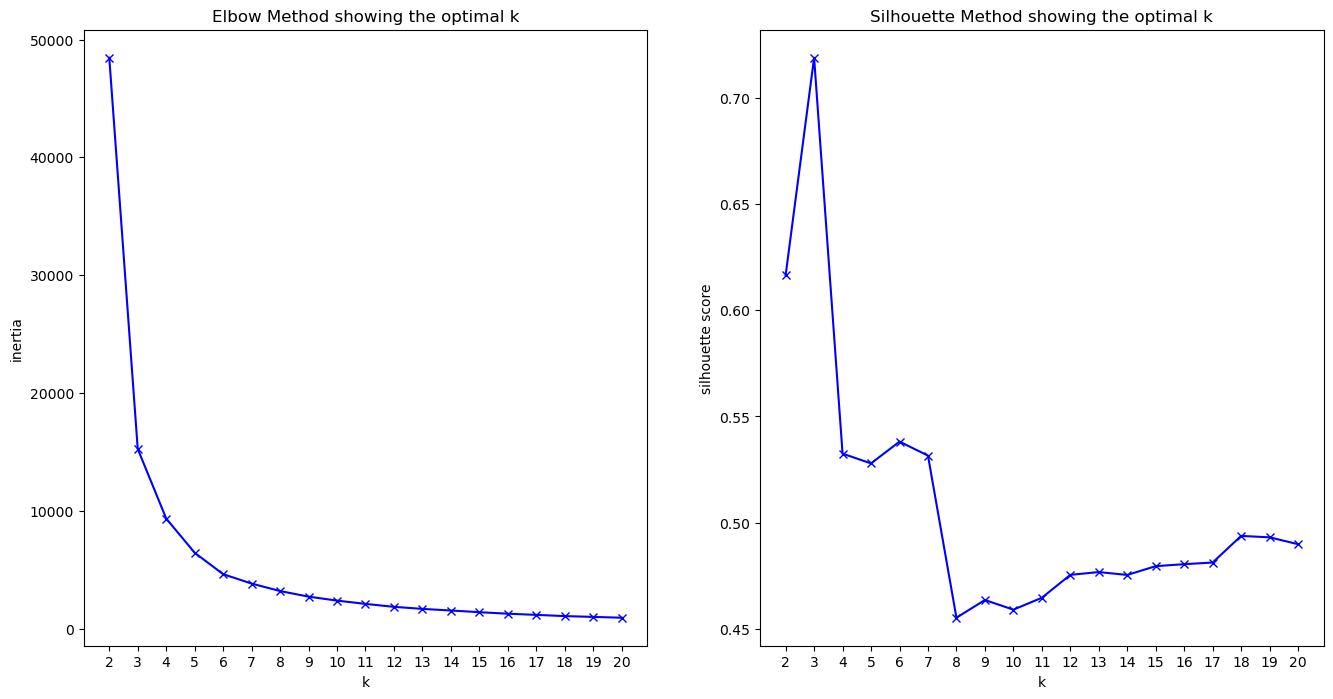

In [121]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

C:\Users\schue\AppData\Local\Temp\ipykernel_24236\3714559172.py:6: UserWarning: The palette list has more values (2799) than needed (3), which may not be intended.
  sns.scatterplot(X_scaled_df, x="UMAP_1", y="UMAP_2", hue="cluster", palette=custom_palette, legend=False)


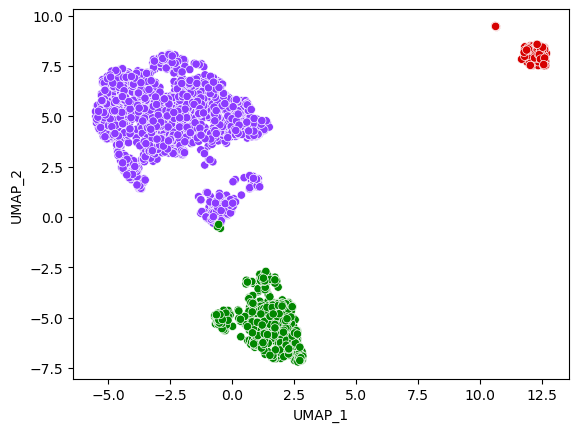

In [55]:
import colorcet as cc
import seaborn as sns
X_scaled_df["cluster_k_mean"] = clusters
fig, ax = plt.subplots()
custom_palette = sns.color_palette(cc.glasbey, n_colors=clusters.size)
sns.scatterplot(X_scaled_df, x="UMAP_1", y="UMAP_2", hue="cluster", palette=custom_palette, legend=False)
plt.show()

## HDBSCAN

In [56]:
from sklearn.datasets import make_classification
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score, calinski_harabasz_score
#from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import time
import pickle
from dbcv import *

In [57]:
X_umap_transformed_df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
UMAP_1,2799.0,-1.0,4.0,-6.0,-3.0,-1.0,1.0,13.0
UMAP_2,2799.0,2.0,5.0,-7.0,-0.0,4.0,6.0,9.0
cluster,2799.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0
cluster_k__mean,2799.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0
cluster_k_mean,2799.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0


In [58]:
X_df = X_umap_transformed_df

scaler = StandardScaler()
scaler.fit(X_df)
X_scaled_np = scaler.transform(X_df)
X_scaled_df = pd.DataFrame(X_scaled_np, columns=X_df.columns)


# Creating the clustering model
model = HDBSCAN(cluster_selection_epsilon=0.4, min_cluster_size=5) # Default values are: eps=0.5, min_samples=5
# fit model and predict clusters
yhat = model.fit_predict(X_scaled_df) # .fit(X_scaled_df)

file = "pickle/hdbscan.pkl"

with open(file, "wb") as file:
    pickle.dump(model, file)


In [59]:
print("The Silhouette score of the model is: ",round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2))
print("The Calinksi-Harabasz score of the model is: ",round(calinski_harabasz_score(X_scaled_df, model.fit_predict(X_scaled_df)),2))

The Silhouette score of the model is:  0.75
The Calinksi-Harabasz score of the model is:  14912.31


In [60]:
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [61]:
X_umap_transformed_df['cluster'] = yhat
X_umap_transformed_df.head()

,UMAP_1,UMAP_2,cluster,cluster_k__mean,cluster_k_mean
0,-1.177344,6.048987,1,1,1
1,-4.348997,6.807801,1,1,1
2,-0.962190,4.102377,1,1,1
3,-2.275147,4.027830,1,1,1
4,-0.685585,4.103041,1,1,1


In [62]:
X_umap_transformed_df['cluster'].nunique()

4

C:\Users\schue\AppData\Local\Temp\ipykernel_24236\2696163898.py:5: UserWarning: The palette list has more values (2799) than needed (4), which may not be intended.
  sns.scatterplot(X_scaled_df, x="UMAP_1", y="UMAP_2", hue="cluster", palette=custom_palette, legend=False)


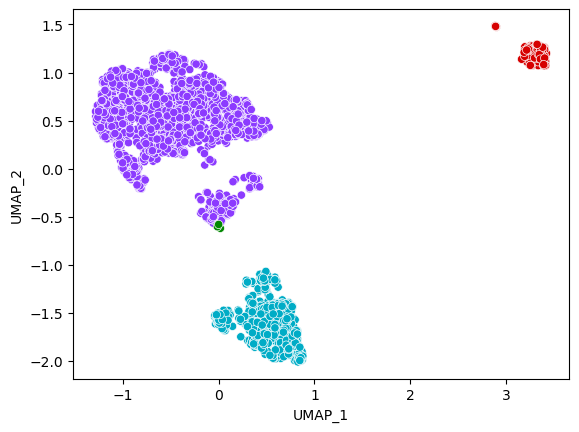

In [63]:
import seaborn as sns
X_scaled_df["cluster"] = yhat
fig, ax = plt.subplots()
custom_palette = sns.color_palette(cc.glasbey, n_colors=clusters.size)
sns.scatterplot(X_scaled_df, x="UMAP_1", y="UMAP_2", hue="cluster", palette=custom_palette, legend=False)
plt.show()

## Scale, UMAP and HDBSCAN in one function

In [ ]:
from umap import UMAP
import seaborn as sns
import colorcet as cc
from sklearn.datasets import make_classification
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score, calinski_harabasz_score
#from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import time
import pickle
from dbcv import *


def creating_cluster(df:pd.DataFrame, eps:float):
    
    #Scaling
    scaler = StandardScaler()
    scaler.fit(df)
    X_scaled = scaler.transform(df)
    filename = "pickle/scaler.pickle" # Path with filename

    with open(filename, "wb") as file:
        pickle.dump(scaler,file)

    X_scaled_df = pd.DataFrame(X_scaled, columns = df.columns)
    
    #UMAP
    reducer = UMAP(n_components=2,random_state=42)
    reducer.fit(X_scaled_df)
    X_umap_transformed = reducer.transform(X_scaled_df)
    X_umap_transformed_df = pd.DataFrame(X_umap_transformed, columns=["UMAP_1","UMAP_2"])
    
    #HDBSCAN
    X_umap_transformed_df

    scaler = StandardScaler()
    scaler.fit(X_umap_transformed_df)
    hdbscan_scaled_np = scaler.transform(X_umap_transformed_df)
    hdbscan_scaled_df = pd.DataFrame(hdbscan_scaled_np, columns=X_umap_transformed_df.columns)


    # Creating the clustering model
    model = HDBSCAN(cluster_selection_epsilon=eps, min_cluster_size=5) # Default values are: eps=0.5, min_samples=5
    # fit model and predict clusters
    yhat = model.fit_predict(hdbscan_scaled_df) # .fit(X_scaled_df)

    file = "pickle/hdbscan.pkl"

    with open(file, "wb") as file:
        pickle.dump(model, file)
    
    X_umap_transformed_df["cluster"] = yhat
    
    fig, ax = plt.subplots()
    custom_palette = sns.color_palette(cc.glasbey, n_colors=yhat.size)
    custom_palette = [color if yhat != -1 else (0.,0.,0.) for yhat, color in zip(yhat,custom_palette)]
    sns.scatterplot(X_umap_transformed_df, x="UMAP_1", y="UMAP_2", hue="cluster", palette=custom_palette, legend="auto")
    plt.show()
    
    return [X_scaled_df, X_umap_transformed_df, hdbscan_scaled_df]
    

In [ ]:
return_creating_cluster = creating_cluster(full_df_num,0.3)

In [ ]:
X_scaled_df = return_creating_cluster[0]
X_umap_transformed_df = return_creating_cluster[1]
hdbscan_scaled_df = return_creating_cluster[2]

## Guessing the best value for epsilon

In [ ]:
from sklearn.neighbors import NearestNeighbors
import plotly.express as px

neighbors = 4 # The value of MinPoints or mins_samples = 2 * number_of_columns
# X_embedded is your data
nbrs = NearestNeighbors(n_neighbors=neighbors).fit(X_scaled_df)
distances, indices = nbrs.kneighbors(X_scaled_df)
print("The 'distances' array is an 2D-array containing as many rows as points and as many columns as mins_samples", distances.shape)
distance_desc = sorted(distances[:,neighbors-1], reverse=True)
fig = px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc).update_layout(
    xaxis_title="Array index", yaxis_title="Distance"
)
fig.add_hline(y=0.5, annotation_text="Default value of epsilon in DBSCAN")
fig.show()